# CA3 - Predicting heart conditions in Aliens

Nida Grønbekk

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We are going to make a model for predicting if an alien gets a heart disease or not (classification problem). We first import the data we are going to use when choosing a model and its parameters.

In [2]:
train_data =pd.read_csv('train.csv',index_col=0)
train_data.head()

,age,antenna_length,blood_blueness,chest_radius,height,salt_levels,siblings,skin_coarseness,target
0,66.0,51.000000,384.0,549.00000,82.5,0.345,3.0,246.0,0
1,63.0,87.460259,306.0,466.64467,75.3,0.234,0.0,156.0,0
2,120.0,87.460259,477.0,466.64467,82.2,0.882,21.0,192.0,0
3,69.0,39.000000,204.0,45.00000,60.3,0.771,6.0,186.0,0
4,132.0,87.460259,318.0,466.64467,70.8,0.411,36.0,240.0,0


Check if there are any missing values in the dataset, in that case we need to handle these before proceeding.

In [3]:
train_data.isnull().sum()

age                0
antenna_length     0
blood_blueness     0
chest_radius       0
height             0
salt_levels        0
siblings           0
skin_coarseness    0
target             0
dtype: int64

No missing values, do not need to worry about this.

We want to predict wheter an alien gets a heart condition (target = 1), or not (target = 0). To do this I will train the model on the train_data and make predictions on test_data that does not have a target value. This will be provided from kaggle. 
We want to try and train on the models: 

    Perceptron
    Adaline
    Logistic regression
    Support vector classifier (SVC kernel=’linear’)
    Support vector classifier (SVC kernel=’rbf’)
    Decision trees
    Random forests
    K-Nearest Neighbours (K-NN)

I will only include the best model with the best parameters here, to avoid a too long report.

## Visualization


Let us examine the training data with some plots.
I was intially thinking I should do the visualization on all of the data, both training and test. But then it does not make sense to later remove observations based on outliers of the data gathered. It is supposed to be tested on all of the test data anyways. So we only do the plotting and visalization on the training data.

### Violin plot

<AxesSubplot:title={'center':'skin coarsness'}>

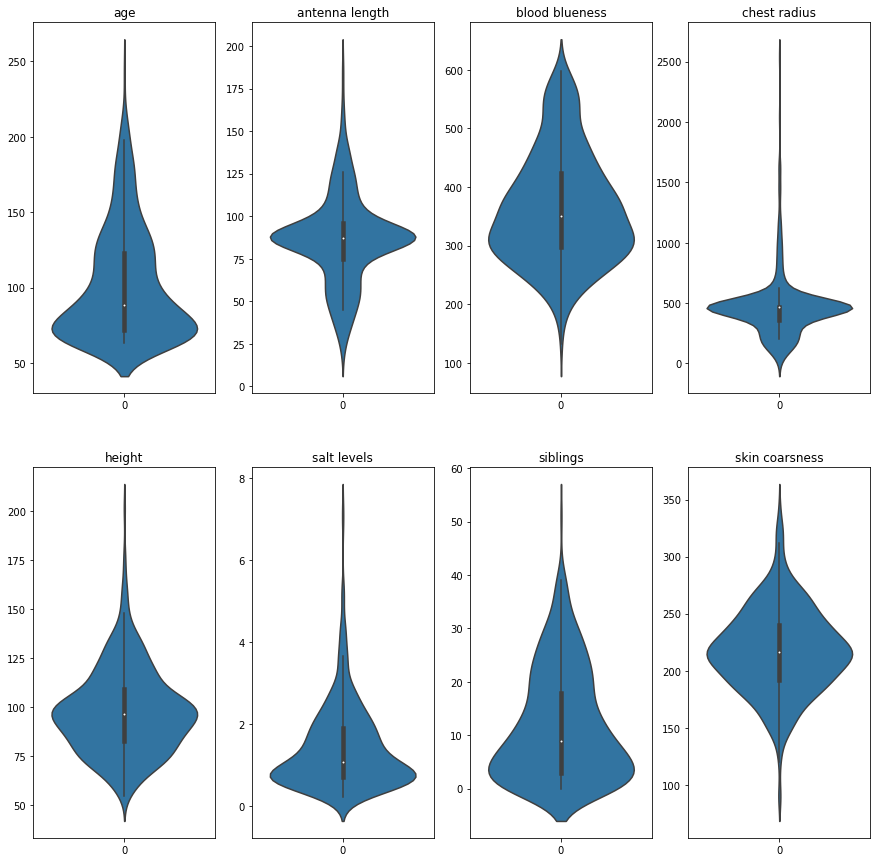

In [4]:
fig, axs = plt.subplots(2, 4, figsize=(15,15))
#2 rows 4 columns
axs[0,0].set_title('age')
sns.violinplot(data=train_data[train_data.columns[0]],ax=axs[0,0])

axs[0,1].set_title('antenna length')
sns.violinplot(data=train_data[train_data.columns[1]],ax=axs[0,1])

axs[0,2].set_title('blood blueness')
sns.violinplot(data=train_data[train_data.columns[2]],ax=axs[0,2])

axs[0,3].set_title('chest radius')
sns.violinplot(data=train_data[train_data.columns[3]],ax=axs[0,3])

axs[1,0].set_title('height')
sns.violinplot(data=train_data[train_data.columns[4]],ax=axs[1,0])

axs[1,1].set_title('salt levels')
sns.violinplot(data=train_data[train_data.columns[5]],ax=axs[1,1])

axs[1,2].set_title('siblings')
sns.violinplot(data=train_data[train_data.columns[6]],ax=axs[1,2])

axs[1,3].set_title('skin coarsness')
sns.violinplot(data=train_data[train_data.columns[7]],ax=axs[1,3])

We can definetly see outliers in all variables, but some are more extreme having heavy outliers in only one end. F.ex. chest radius. Most values between 0 and 600, but some have value 2700. Salt levels have most values between 0 and 4, but some have value 8. And height seems to have some outliers, most values between 0 and 150, but a few have 220.

### Scatter matrix

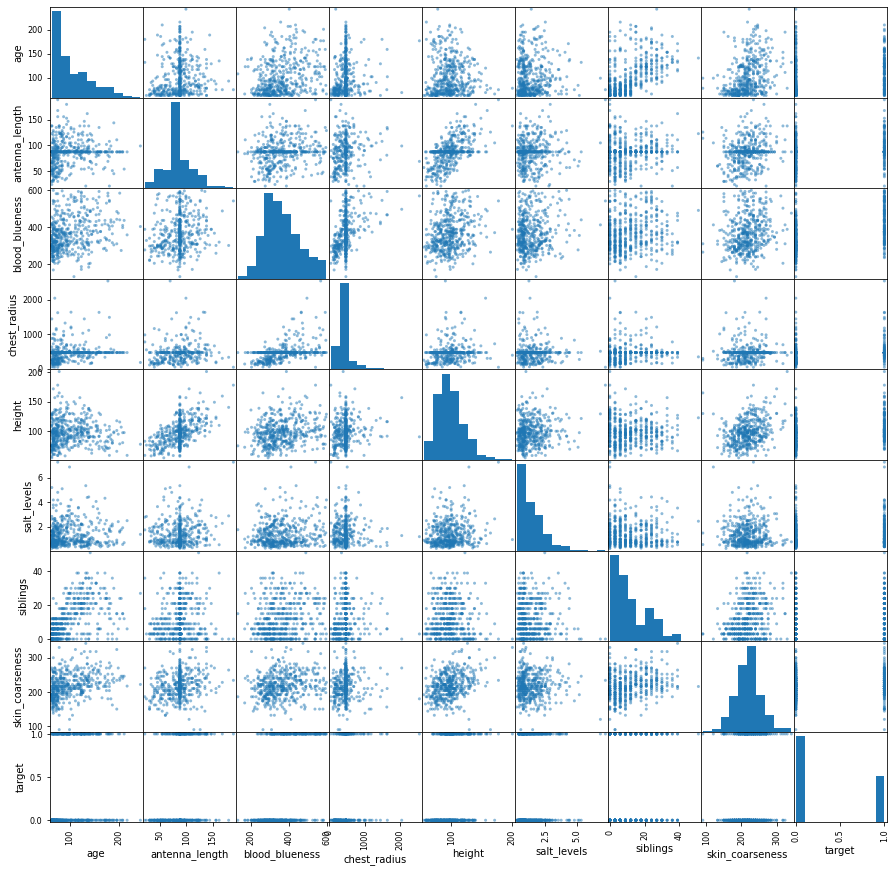

In [5]:
axes=pd.plotting.scatter_matrix(train_data, figsize=(15,15))

In a lot of the plots it does not seem like the points follow a specific model. They simply look like random clouds of points. In a lot of them most of the points seem to lie along a straight line. However in some of the plots like siblings vs. any variable, the points seem separable by straight lines, here decision trees might be a good choice to easily draw lines between the points. 

### Correlation Matrix

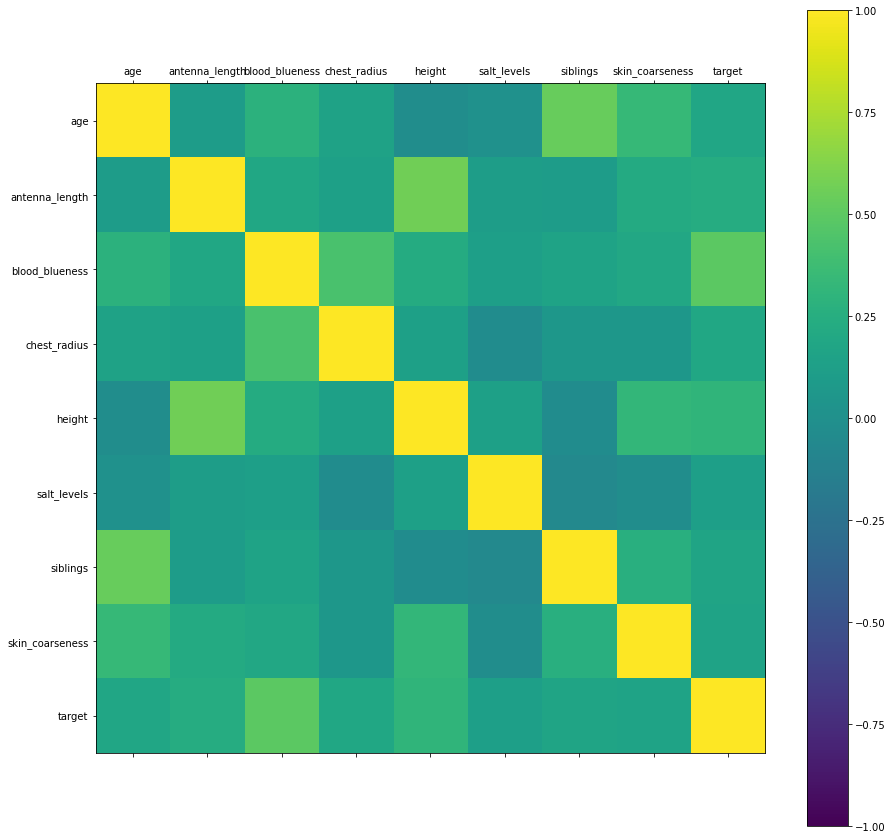

In [6]:
correlations = train_data.corr()
# the code is retrieved from the lecture code
fig = plt.figure(figsize=(15,15))
# # add a subplot for the colorbar
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(train_data.columns))
ax.set_yticklabels(list(train_data.columns))
plt.show()

Most of the variables have very low correlation (between 0 and +/- 0.25). But siblings and age, antenna length and height seem to have some correlation, around 0.75. Then there are several other varibles with correlations +/- 0.5. So not that high correlation between variables overall. But a few stand out as mentioned. The target and blood blueness have a correlation of around >0.5, seems like this variable is important in predicting the target later on.

## Workflow
I will explain how I worked and thought to get to my result:

I started out by finding the best parameters for each model according to our training data. So loop through a set of values that the parameter takes (f.ex. C in SVC), then for each parameter choice, perform 100 test-train splits and calculate performance test accuracy. Then take the mean of these 100 accuracies and add to a list/dataframe of overall test accuracy for each choice of parameter or parameters in the model. 

After finding the best parameters, (the ones giving the highest test accuracy according to the test-train splits), I fitted a model using the best parameters on all of the training data. Then used the models to predict a target value for the test data. I saved the id of the observations in the test set and the predicted value in a dataframe and exported it to a csv file. When uploading them to kaggle two models got great scores:
 - KNeighborsClassifier using parameters p=1 and k=12
 - SupportVectorClassifier using the rbf kernel with parameters C=0.4 and gamma=0.1

They got scores 0.80645 and 0.80769 respectively. I chose to proceed with these two models. 

I tried to remove outliers from the data based on the variables 'chest radius' and 'salt levels' that had the most extreme cases of outliers. I removed observations where these features had values outside the 10th and 90th percentile (like I did in CA2). Then fitted the models on this new reduced data with the best parameters. However this worsened the performance according to the kaggle score. To be sure, I also tried to find the best parameters again based on the reduced dataset, but got the same parameters. I therefore chose to not remove outliers in the final model.

I then tried to perform feature selection using sequential backward selection and sequential forward selection. Doing so only worsened the performance of the KNN model, however it improved the performance of the SVC (rbf kernel) model. So this is the model I ended up with.

I also tried to fit a model on the training data with removed outliers and only including the best features according to sequential feature selection, but this worsened the performance. Better to not remove outliers in this case as well.

Below I include the code that I used to find the best model (SVC with rbf kernel).

## Finding the best parameters

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Finding the best C and gamma parameters. 

In [8]:
# Define X and y
X=train_data[train_data.columns[:-1]]
y=train_data[train_data.columns[8]]

# We will find test accuracy for these values for the parameters
c_val=np.arange(0.3,0.8,0.1)
gamma_val=np.arange(0.1,0.6,0.1)

#to save accuracies as we iterate through the c and gamma values:
accuracies=np.zeros((len(c_val),len(gamma_val)))

for c_ind,c in enumerate(c_val):
    for gamma_ind,gamma in enumerate(gamma_val):
        acc=[] # store accuracy for each test-train split here
        for rs in range(1,101):
            #split in 70% training set and 30% test set, changing random state
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                                    stratify=y,random_state=rs)
            #scale the data
            sc = StandardScaler()
            sc.fit(X_train)
            # Standardise both X_train and X_test with mean and STD from
            # training data
            X_train_sc = sc.transform(X_train)
            X_test_sc = sc.transform(X_test)
            
            # Create and fit model on training data using current c and gamma value
            svc=SVC(kernel='rbf',C=c,random_state=1,gamma=gamma)
            svc.fit(X_train_sc,y_train)
            
            # calculate test accuracy
            accuracy=svc.score(X_test_sc, y_test)
            acc.append(accuracy)
        # add mean of accuracies to np array 
        accuracies[c_ind,gamma_ind]=np.mean(acc)

#save the accuracies as dataframe with correct
#rownames and column names.        
rownames=['C = {}'.format(round(c,1)) for c in c_val]
colnames=['g = {}'.format(round(g,1)) for g in gamma_val]
acc_df = pd.DataFrame(data=accuracies,index=rownames,columns=colnames) 

I now view the accuracies:

In [9]:
acc_df

,g = 0.1,g = 0.2,g = 0.3,g = 0.4,g = 0.5
C = 0.3,0.745435,0.729058,0.711884,0.685797,0.667029
C = 0.4,0.747971,0.734058,0.717971,0.698116,0.680652
C = 0.5,0.746957,0.733551,0.720580,0.708986,0.687464
C = 0.6,0.746159,0.732464,0.723043,0.714710,0.694783
C = 0.7,0.745362,0.732826,0.726522,0.717536,0.706159


In [10]:
acc_df.max().max()

0.7479710144927537

The highest test accuracy was 0.74797.

In [11]:
acc_df.unstack().idxmax()

('g = 0.1', 'C = 0.4')

As you can see the best accuracy occured for gamma=0.1 and C=0.4. Could be tempting to check for smaller gamma as it got worse for larger values.

Tried for gamma in range 0.01 to 0.1 and got best accuracy for gamma=0.01 and C=0.6, but when uploading to kaggle the accuracy got much worse than the case above. Might be because of overfitting. Therefore we stick with C=0.4 and gamma=0.1 as the best parameters. 

## Feature selection

I tried using both forward and backward feature selection. But the best score appeared when using sequential backward selection. I include the code for this below.

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

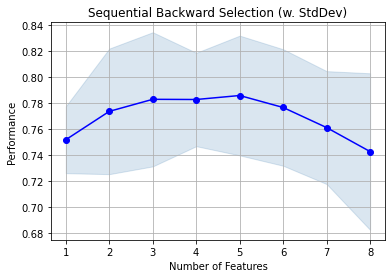

In [13]:
# Split the data into a 30% test and 70% training set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,stratify=y, random_state=0)

# Scale and transform the training and test data according to the mean and std of the training set.
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Create an instance of the model with the best parameters
svc=SVC(kernel='rbf',C=0.4,gamma=0.1,random_state=1)

#Start the sequential feature selector. It is backward selection (forward=False), removes one by one until we are left with
#one feature(k_features=1). Use our model svc to choose features, and choose the features based on accuracy (scoring)
sfs = SFS(svc, 
           k_features=1, 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=5)
# Fit the models
sfs = sfs.fit(X_train_std, y_train)

# This dictionary contains results from all compuations, that is, metrics from models with 8 until 1 features
metricDict = sfs.get_metric_dict()

# Initialise plot
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')


plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

It looks like we get the best accuracies when using 3 or 5 features, print the number of features used and the average score from metricDict to make sure.

In [14]:
for num_features,dic in metricDict.items():
    print('Number of features: ',num_features,',score: ',dic['avg_score'])

Number of features:  8 ,score:  0.7424519230769231
Number of features:  7 ,score:  0.7609134615384615
Number of features:  6 ,score:  0.7763942307692308
Number of features:  5 ,score:  0.785625
Number of features:  4 ,score:  0.7825480769230769
Number of features:  3 ,score:  0.7826923076923077
Number of features:  2 ,score:  0.7734134615384616
Number of features:  1 ,score:  0.7515865384615384


We see from the scores that the accuracy is best when using 5 features. Let us fit a model on the 5 features using the SVC model with rbf kernel using C=0.4 and gamma=0.1. First get index of the 5 best features:

In [15]:
metricDict[5]['feature_idx']

(2, 3, 4, 5, 6)

## Final model
Now fit the model using these indexes. Note that when predicting the target for the test data we need to only include the features we trained the model on.

In [19]:
# The 5 features to be included:
X_sfs=X.iloc[:,[2,3,4,5,6]]
#load the test data we are predicting target for:
test_data=pd.read_csv('test.csv',index_col=0)
# Make sure we only test on the same features:
X_test_sfs=test_data.iloc[:,[2,3,4,5,6]]

#Scale the training and test data based on mean and std of training set.
sc = StandardScaler()
sc.fit(X_sfs)
X_sc = sc.transform(X_sfs)
X_test_sc=sc.transform(X_test_sfs)

#Fit the model on the training data
svc_rbf_sfs=SVC(kernel='rbf',C=0.4,random_state=1,gamma=0.1)
svc_rbf_sfs.fit(X_sc,y)
# Make predictions for test data
y_pred=svc_rbf_sfs.predict(X_test_sc)

# store predictions in dataframe
id_col=[i for i in range(0,len(X_test_sfs))]
dict_val={'id': id_col,'Predicted': y_pred}
results=pd.DataFrame(dict_val)
results=results.set_index('id')
#save to a csv file
#results.to_csv('C:\\Users\\Nida\\NMBU\\DAT200\\CA3\\svc_rbf_sfs_results.csv')

When uploading to kaggle i got a score of 0.82142 on the public leaderboard.